In [72]:
# Import the sys module to access the path of the current Python executable.
import sys

# psycopg2-binary is a Python library that allows your Python code to connect to a PostgreSQL database. 
# It’s built on psycopg2, which is the most widely used PostgreSQL adapter for Python.

!{sys.executable} -m pip install psycopg2-binary

In [3]:
# Import pandas for data manipulation and analysis.
# It's the most commonly used library for handling structured data in Python.
import pandas as pd

# Import numpy for numerical operations, especially useful for working with arrays and statistical functions.
import numpy as np

# Import seaborn for statistical data visualization; built on top of matplotlib and provides a cleaner aesthetic.
import seaborn as sns

# Import matplotlib to customize and control plotting behavior.
import matplotlib

# Import pyplot, a submodule of matplotlib, used for creating figures and plots interactively.
import matplotlib.pyplot as plt

# Import psycopg2 to allow Python to connect and execute SQL commands on a PostgreSQL database.
import psycopg2

In [5]:
# Import the function to check the installed Python version
from platform import python_version

# Print the installed version of Python and the minimum required version
print('python version installed     :', python_version(), '    ,needed: 3.7.7 or higher')

# Print the installed version of matplotlib and the minimum required version
print('matplotlib version installed :', matplotlib.__version__, '    ,needed: 3.2.2 or higher')

# Print the installed version of numpy and the minimum required version
print('numpy version installed      :', np.__version__, '    ,needed: 1.19.5 or higher')

python version installed     : 3.12.2     ,needed: 3.7.7 or higher
matplotlib version installed : 3.9.2     ,needed: 3.2.2 or higher
numpy version installed      : 1.26.4     ,needed: 1.19.5 or higher


In [66]:
# Run the Docker Compose command to start the PostgreSQL container in detached mode.
# This command ensures that the OnMart database is up and running for querying.
!docker compose -f "/Users/daniel/Documents/Northwestern/MSDS 420 - Database Systems/Assignment 3/docker-compose.yml" up -d

[+] Running 1/1
 ✔ Container onmart  Running                                               0.0s 


In [68]:
# Establish a connection to the PostgreSQL database
db_connection = psycopg2.connect(
    host='127.0.0.1',        # IP address of the Postgres database server (same as 'localhost')
    port=5436,               # This must match the port you exposed in docker-compose.yml
    dbname="onmart_superstore",  # This is the exact name of the database inside your Docker container
    user="postgres",         # Default PostgreSQL user
    password="root"          # Password defined in your Docker setup
)

cursor = db_connection.cursor() # Create a cursor object to execute SQL queries and fetch data from the PostgreSQL database

In [70]:
# Execute SQL query to retrieve column names from the 'transactions_log' table
cursor.execute("SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = 'transactions_log'")

# Fetch all the rows returned by the executed query
columns = cursor.fetchall()

# Display the fetched column names
columns

[('profit',),
 ('expecteddeliverydate',),
 ('actualdeliverydate',),
 ('purchasedate',),
 ('quantity',),
 ('price',),
 ('rating',),
 ('shippingcost',),
 ('discount',),
 ('sales',),
 ('homezipcode',),
 ('segment',),
 ('orderpriority',),
 ('orderreturned',),
 ('reviewid',),
 ('friends',),
 ('customerid',),
 ('sharedwith',),
 ('firstname',),
 ('lastname',),
 ('creditcardnumber',),
 ('orderid',),
 ('productid',),
 ('department',),
 ('category',),
 ('itempurchased',),
 ('deliveryzipcode',)]

In [22]:
# Get 5 rows from the transactions_log table

# Execute the SQL query using the cursor object.
# This query selects all columns but limits the result to the first 5 rows for a quick data preview.
cursor.execute("SELECT * from transactions_log LIMIT 5;")

# Fetch all the rows returned by the executed query.
# This will return a list of 5 tuples, where each tuple is one row from the table.
rows = cursor.fetchall()

# Print the retrieved rows
# This loop prints each row to help visually inspect the structure and sample data values.
for row in rows:
    print(row)

('438-41-0336', 'Camryn', 'Collins', 'xxxx-xxxx-xxxx-5349', '70fa8d0e-9af4-461a-80d4-e15e4a0221fb', datetime.date(2019, 11, 19), datetime.date(2019, 11, 23), datetime.date(2019, 11, 27), 'OFF-AP-6485-170', 'Office Supplies', 'Appliances', 'RFID Scanners', 2, 326.99, 25.29, 24.46, 654.81, 65.481, '90048', '90048', 'Home Office', 'Critical', 'No', 5, '', '', '')
('272-43-1200', 'Kian', 'Cronin', 'xxxx-xxxx-xxxx-5326', 'f3814223-cbd7-41af-b4bd-c5fe4b920097', datetime.date(2020, 12, 9), datetime.date(2020, 12, 13), datetime.date(2020, 12, 17), 'CLO-SH-5447-076', 'Clothing', 'Shorts', 'Flying Machine Denim Shorts', 4, 11.8, 2.83, 1.67, 48.36, 3.3852, '33283', '33283', 'Corporate', 'Critical', 'No', -1, '14223-cbd7', '', '')
('667-64-3631', 'Harry', 'Hickle', 'xxxx-xxxx-xxxx-5014', '940c6892-6e1c-4b7b-82b8-195cfde04fee', datetime.date(2018, 10, 31), datetime.date(2018, 11, 4), datetime.date(2018, 11, 8), 'ELE-PH-9857-139', 'Electronics', 'Phones', 'Panasonic Cordless Phone', 2, 733.6, 9.49, 

In [24]:
# Putting all together in a pandas DataFrame.

# Retrieve column names from the cursor.description attribute.
# cursor.description returns metadata for each column in the result set.
# Each item in the metadata is a tuple where the first element is the column name.
columns = [column[0] for column in cursor.description]

# Create a DataFrame using the fetched data (stored in 'rows') and the column names.
# This creates a clean tabular format that's easier to work with in pandas.
customers = pd.DataFrame(rows, columns=columns)

# Display the DataFrame to preview the data
customers

,customerid,firstname,lastname,creditcardnumber,orderid,purchasedate,expecteddeliverydate,actualdeliverydate,productid,department,...,profit,deliveryzipcode,homezipcode,segment,orderpriority,orderreturned,rating,reviewid,friends,sharedwith
0,438-41-0336,Camryn,Collins,xxxx-xxxx-xxxx-5349,70fa8d0e-9af4-461a-80d4-e15e4a0221fb,2019-11-19,2019-11-23,2019-11-27,OFF-AP-6485-170,Office Supplies,...,65.4810,90048,90048,Home Office,Critical,No,5,,,
1,272-43-1200,Kian,Cronin,xxxx-xxxx-xxxx-5326,f3814223-cbd7-41af-b4bd-c5fe4b920097,2020-12-09,2020-12-13,2020-12-17,CLO-SH-5447-076,Clothing,...,3.3852,33283,33283,Corporate,Critical,No,-1,14223-cbd7,,
2,667-64-3631,Harry,Hickle,xxxx-xxxx-xxxx-5014,940c6892-6e1c-4b7b-82b8-195cfde04fee,2018-10-31,2018-11-04,2018-11-08,ELE-PH-9857-139,Electronics,...,233.0992,60612,60612,Consumer,High,No,5,,,
3,320-10-6885,Adam,Nolan,xxxx-xxxx-xxxx-2072,b8973a38-4246-483c-b369-3806402a1bd7,2018-11-27,2018-12-01,2018-12-05,ELE-CO-5426-764,Electronics,...,299.3508,30390,30390,Consumer,High,No,3,,,
4,440-17-2806,Pansy,Hilll,xxxx-xxxx-xxxx-1407,e84683f0-f6f0-4855-ad75-262060009feb,2018-04-11,2018-04-15,2018-04-19,CLO-SH-1287-520,Clothing,...,4.0375,90077,90077,Corporate,Critical,No,-1,,,


In [26]:
# SQL query to select all records from the transactions_log table
# Limiting to 5000 records to avoid overloading memory and improve performance
query = '''
        SELECT * 
        FROM transactions_log
        LIMIT 5000;
        '''

# Execute the SQL query using the cursor object
cursor.execute(query)

# Fetch all rows returned by the executed query and store them in the 'data' variable
data = cursor.fetchall()

# Retrieve column names using cursor.description
# Each item in the description is a tuple where the first element is the column name
colnames = [desc[0] for desc in cursor.description]

# Create a DataFrame using the fetched data and column names
# This DataFrame will represent a larger sample of the transactions_log table
customers = pd.DataFrame(data, columns=colnames)

# Display basic information about the DataFrame:
# - Column data types
# - Number of non-null values
# - Memory usage
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customerid            5000 non-null   object 
 1   firstname             5000 non-null   object 
 2   lastname              5000 non-null   object 
 3   creditcardnumber      5000 non-null   object 
 4   orderid               5000 non-null   object 
 5   purchasedate          5000 non-null   object 
 6   expecteddeliverydate  5000 non-null   object 
 7   actualdeliverydate    5000 non-null   object 
 8   productid             5000 non-null   object 
 9   department            5000 non-null   object 
 10  category              5000 non-null   object 
 11  itempurchased         5000 non-null   object 
 12  quantity              5000 non-null   int64  
 13  price                 5000 non-null   float64
 14  shippingcost          5000 non-null   float64
 15  discount             

In [28]:
# Get the column names for the 'logistics_supply_chain_network' table

# Execute a SQL query to retrieve column names from the information schema
# This helps understand the structure of the table before querying its contents
cursor.execute("SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = 'logistics_supply_chain_network'")

# Fetch all the rows (column names) returned by the query
rows = cursor.fetchall()

# Display the column names
rows

[('where_is',),
 ('latitude',),
 ('longitude',),
 ('warehouse_id',),
 ('zipcode',),
 ('facility_id',),
 ('distribution_center_id',),
 ('city',),
 ('state',)]

In [30]:
# Display 5 rows from the table logistics_supply_chain_network

# Execute a SQL query to retrieve all records from the logistics_supply_chain_network table
# This allows you to explore the delivery infrastructure (zip codes, cities, facilities, etc.)
cursor.execute("SELECT * FROM logistics_supply_chain_network;")

# Fetch all rows returned by the query
data = cursor.fetchall()

# Retrieve column names using cursor.description
# This gives us the headers needed for building the DataFrame
colnames = [desc[0] for desc in cursor.description]

# Create a pandas DataFrame using the fetched data and column names
# This structure makes it easier to inspect, filter, and analyze the delivery data
centers = pd.DataFrame(data, columns=colnames)

# Display the first 5 rows of the DataFrame
centers.head()

,zipcode,city,state,latitude,longitude,facility_id,distribution_center_id,warehouse_id,where_is
0,60651,Chicago,IL,41.901485,-87.74055,Warehouse_1,DistributionCenter_1,Warehouse_1,0101000020E6100000D36A48DC63F3444061C3D32B65EF...
1,60697,Chicago,IL,41.811929,-87.68732,,DistributionCenter_1,Warehouse_1,0101000020E610000045D61A4AEDE74440C078060DFDEB...
2,60667,Chicago,IL,41.811929,-87.68732,,DistributionCenter_1,Warehouse_1,0101000020E610000045D61A4AEDE74440C078060DFDEB...
3,60694,Chicago,IL,41.811929,-87.68732,,DistributionCenter_1,Warehouse_1,0101000020E610000045D61A4AEDE74440C078060DFDEB...
4,60684,Chicago,IL,41.811929,-87.68732,,DistributionCenter_1,Warehouse_1,0101000020E610000045D61A4AEDE74440C078060DFDEB...


In [32]:
# Check how many unique zip codes are represented in the logistics network
# This gives an idea of the geographical spread of distribution and warehouse operations
centers['zipcode'].nunique()

785

In [34]:
# Check the number of unique facility IDs
# Each facility_id may represent a warehouse, distribution center, or another delivery location
centers['facility_id'].nunique()

# Check the number of unique distribution centers
# According to the assignment, you should see 97 distinct distribution center zip codes
centers['distribution_center_id'].nunique()

# Check the number of unique warehouses
# According to the assignment, this should return 17 unique warehouses
centers['warehouse_id'].nunique()

22

In [36]:
# What states are there?
# This command shows the number of facilities located in each U.S. state.
# It helps identify geographic concentration or gaps in OnMart's logistics network.
centers['state'].value_counts()

state
NY    166
TX    123
GA    111
CA    100
FL     96
IL     85
MA     54
TN     44
NJ      1
MI      1
NC      1
PA      1
IA      1
VA      1
Name: count, dtype: int64

In [38]:
# SQL query to get the top 5 delivery zip codes with the most returns
query = '''
    SELECT deliveryzipcode, COUNT(*) AS return_count
    FROM transactions_log
    WHERE orderreturned = 'Yes'
    GROUP BY deliveryzipcode
    ORDER BY return_count DESC
    LIMIT 5;
'''

# Execute the SQL query
cursor.execute(query)

# Fetch and display the results
results = cursor.fetchall()
print("Top 5 zip codes with the most returns:")
for row in results:
    print(f"Zip Code: {row[0]}, Returns: {row[1]}")

Top 5 zip codes with the most returns:
Zip Code: 2222, Returns: 854
Zip Code: 10043, Returns: 854
Zip Code: 90051, Returns: 852
Zip Code: 33299, Returns: 850
Zip Code: 90045, Returns: 850


In [40]:
# SQL query to count total orders for each product category in each delivery zip code
# Grouped by category and delivery zip, and sorted alphabetically by category
query = '''
    SELECT category, deliveryzipcode, COUNT(*) AS total_orders
    FROM transactions_log
    GROUP BY category, deliveryzipcode
    ORDER BY category;
'''

# Execute the SQL query
cursor.execute(query)

# Fetch and display the results
results = cursor.fetchall()
print("Total orders per category by delivery zip code:")
for row in results:
    print(f"Category: {row[0]}, Zip Code: {row[1]}, Orders: {row[2]}")

Total orders per category by delivery zip code:
Category: Accessories, Zip Code: 10001, Orders: 168
Category: Accessories, Zip Code: 10002, Orders: 169
Category: Accessories, Zip Code: 10003, Orders: 156
Category: Accessories, Zip Code: 10004, Orders: 163
Category: Accessories, Zip Code: 10005, Orders: 166
Category: Accessories, Zip Code: 10006, Orders: 159
Category: Accessories, Zip Code: 10007, Orders: 174
Category: Accessories, Zip Code: 10008, Orders: 158
Category: Accessories, Zip Code: 10009, Orders: 168
Category: Accessories, Zip Code: 10010, Orders: 149
Category: Accessories, Zip Code: 10011, Orders: 159
Category: Accessories, Zip Code: 10012, Orders: 168
Category: Accessories, Zip Code: 10013, Orders: 168
Category: Accessories, Zip Code: 10014, Orders: 182
Category: Accessories, Zip Code: 10015, Orders: 178
Category: Accessories, Zip Code: 10016, Orders: 163
Category: Accessories, Zip Code: 10017, Orders: 144
Category: Accessories, Zip Code: 10018, Orders: 160
Category: Access

In [88]:
#Question 1- To see the delivery zip code with the most returns, count the total number of order returns per delivery zip code. Show the **top five** zip codes with their count.
#SQL query to count the number of returns per delivery zip code
# - Filters for returned orders only
# - Groups by delivery zip code
# - Orders by return count descending
# - Limits to the top 5 zip codes
query = '''
    SELECT deliveryzipcode, COUNT(*) AS return_count
    FROM transactions_log
    WHERE orderreturned = 'Yes'
    GROUP BY deliveryzipcode
    ORDER BY return_count DESC
    LIMIT 5;
'''

# Execute the SQL query
cursor.execute(query)

# Fetch and display the results
results = cursor.fetchall()
print("Top 5 delivery zip codes by number of returns:")
for row in results:
    print(f"Zip Code: {row[0]}, Returns: {row[1]}")

Top 5 delivery zip codes by number of returns:
Zip Code: 2222, Returns: 854
Zip Code: 10043, Returns: 854
Zip Code: 90051, Returns: 852
Zip Code: 33299, Returns: 850
Zip Code: 90045, Returns: 850


In [84]:
# SQL query to get all unique product categories from the transactions_log table
# Kept getting answeres that just showed accessories; I ran the code below to see if there were any other cateogries and sure enough I found there were serveral
query = '''
    SELECT DISTINCT category
    FROM transactions_log
    ORDER BY category;
'''

# Execute the query
cursor.execute(query)

# Fetch results
categories = cursor.fetchall()

# Display as a flat list
print("Available Product Categories:")
for cat in categories:
    print("-", cat[0])

Available Product Categories:
- Accessories
- Appliances
- Art
- Athletic Clothing
- Beans
- Binders
- Bookcases
- Chairs
- Copiers
- Fitness
- Furnishings
- Golf
- Hunting & Fishing
- Machines
- Nuts
- Pasta
- Phones
- Shorts
- Snacks
- Tables
- TShirt


In [94]:
# Question 2-  Count the total number of orders for every product category in every Delivery Zip Code. Sort output by category.  **( Use SQL - Postgres )**
# First column is justthe pandas Dataframe Index; it automatically assigns row number to each row.
# SQL query to count total number of orders per category and delivery zip code
# This will return ALL categories and zip combinations, sorted alphabetically by category
query = '''
    SELECT category, deliveryzipcode, COUNT(*) AS total_orders
    FROM transactions_log
    GROUP BY category, deliveryzipcode
    ORDER BY category;
'''

# Execute query
cursor.execute(query)

# Fetch results and get column names
results = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]

# Load into DataFrame
category_zip_orders = pd.DataFrame(results, columns=columns)

# Show all unique categories in the results
print("Categories found in grouped results:")
print(sorted(category_zip_orders['category'].unique()))

# Optional: Show a sample from each category
print("\nSample rows from each product category:")
sample = category_zip_orders.groupby('category').head(1)
print(sample)

Categories found in grouped results:
['Accessories', 'Appliances', 'Art', 'Athletic Clothing', 'Beans', 'Binders', 'Bookcases', 'Chairs', 'Copiers', 'Fitness', 'Furnishings', 'Golf', 'Hunting & Fishing', 'Machines', 'Nuts', 'Pasta', 'Phones', 'Shorts', 'Snacks', 'TShirt', 'Tables']

Sample rows from each product category:
                category deliveryzipcode  total_orders
0            Accessories           10001           168
785           Appliances           10001           192
1570                 Art           10001           220
2355   Athletic Clothing           10001           139
3140               Beans           10001           158
3925             Binders           10001           235
4710           Bookcases           10001           144
5495              Chairs           10001           173
6280             Copiers           10001           152
7065             Fitness           10001           184
7850         Furnishings           10001           149
8635            

In [100]:
# Question 3 - Calculate the total sales for each delivery zip code using the **sales** column for your total sales value. **Note that returned orders should not be counted as sales**. Sort the results by total sales in descending order, rounding to the nearest cent. Display **only** the top ten results. **(Use SQL - PostgreSQL)**
# SQL query to calculate total sales per delivery zip code
# - Filters out returned orders (orderreturned = 'No')
# - Groups by delivery zip code
# - Sums the sales column
# - Rounds total sales to 2 decimal places
# - Sorts in descending order
# - Limits to the top 10 zip codes
query = '''
    SELECT deliveryzipcode, ROUND(SUM(sales)::numeric, 2) AS total_sales
    FROM transactions_log
    WHERE orderreturned = 'No'
    GROUP BY deliveryzipcode
    ORDER BY total_sales DESC
    LIMIT 10;
'''

# Execute the SQL query
cursor.execute(query)

# Fetch the results
results = cursor.fetchall()

# Display the output
print("Top 10 Delivery Zip Codes by Total Sales (Non-Returned Orders Only):")
for row in results:
    print(f"Zip Code: {row[0]}, Total Sales: ${row[1]:,.2f}")

Top 10 Delivery Zip Codes by Total Sales (Non-Returned Orders Only):
Zip Code: 75284, Total Sales: $3,297,252.34
Zip Code: 37237, Total Sales: $3,245,992.89
Zip Code: 75236, Total Sales: $3,242,844.58
Zip Code: 33172, Total Sales: $3,233,460.04
Zip Code: 33231, Total Sales: $3,232,382.14
Zip Code: 30332, Total Sales: $3,229,446.38
Zip Code: 31195, Total Sales: $3,228,091.48
Zip Code: 30343, Total Sales: $3,220,700.04
Zip Code: 10006, Total Sales: $3,217,293.72
Zip Code: 2104, Total Sales: $3,211,367.73


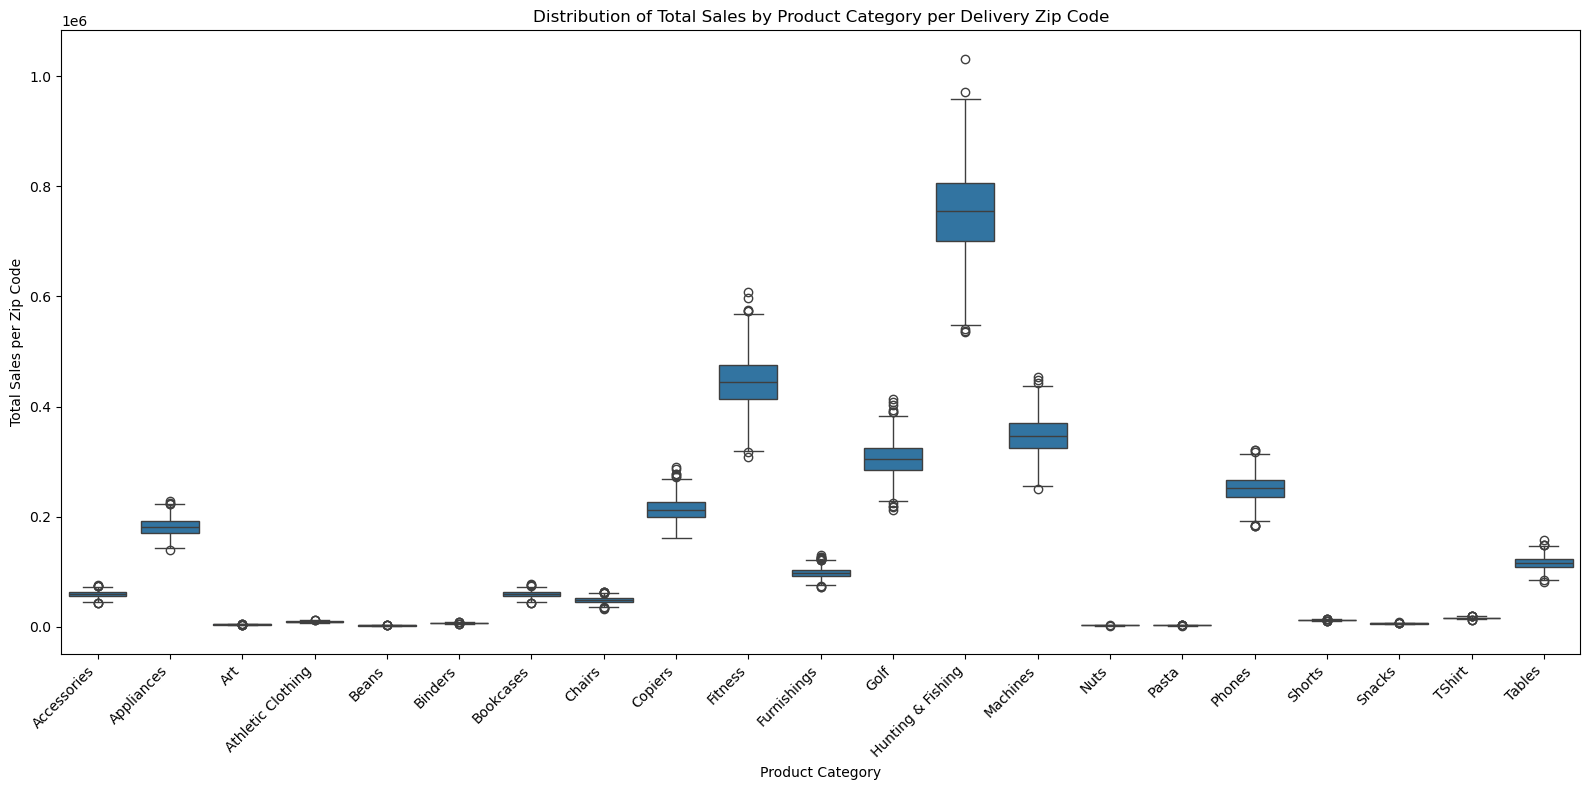

In [102]:
# Step 1: SQL query to get delivery zip, category, and sales for non-returned orders
query = '''
    SELECT deliveryzipcode, category, sales
    FROM transactions_log
    WHERE orderreturned = 'No'
'''

# Execute the query
cursor.execute(query)
results = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]

# Step 2: Load into DataFrame
df_sales = pd.DataFrame(results, columns=columns)

# Step 3: Group by zip and category, summing sales
sales_by_zip_category = df_sales.groupby(['deliveryzipcode', 'category'])['sales'].sum().reset_index()

# Step 4: Create the boxplot using Seaborn
plt.figure(figsize=(16, 8))  # Adjust figure size for readability
sns.boxplot(
    data=sales_by_zip_category,
    x='category',
    y='sales'
)

# Step 5: Customize the chart
plt.xticks(rotation=45, ha='right')  # Make sure category labels are legible
plt.title("Distribution of Total Sales by Product Category per Delivery Zip Code")
plt.xlabel("Product Category")
plt.ylabel("Total Sales per Zip Code")

# Step 6: Display the plot
plt.tight_layout()
plt.show()

# Question 4B - Insights on what the graph shows.
# Insights from Boxplot: Total Sales by Product Category per Delivery Zip Code

# - "Hunting & Fishing" has the highest overall sales distribution across zip codes.
#   It includes many high-value orders and some extreme outliers exceeding $1M in total sales.

# - "Fitness", "Copiers", and "Machines" also show strong total sales,
#   with relatively large interquartile ranges (IQRs) and a few high-value outliers.

# - Categories like "Art", "Athletic Clothing", "Beans", "Nuts", "Pasta", and "Snacks"
#   have consistently low total sales, showing flat boxplots close to zero.

# - "Appliances" and "Phones" are mid-performing categories with moderate IQRs,
#   indicating consistent sales but lower magnitude compared to top categories.

# - "TShirts", "Chairs", and "Tables" show decent sales levels but with more concentrated distributions,
#   suggesting performance is driven by a few zip codes rather than broadly across the dataset.

# - "Accessories", "Bookcases", and "Binders" have low but steady distributions, 
#   indicating lower volume but stable demand across multiple locations.

In [142]:
# Question 5 -
# Step 1: Write the SQL query to get total orders per category, home zip, and purchase month.
# - EXTRACT(MONTH FROM purchasedate): pulls the month number (1-12) from the purchase date.
# - GROUP BY ensures we aggregate total orders for each unique (category, homezipcode, month) combination.
query = '''
    SELECT category, homezipcode, EXTRACT(MONTH FROM purchasedate) AS purchase_month,
           COUNT(*) AS total_orders
    FROM transactions_log
    GROUP BY category, homezipcode, purchase_month
'''

# Step 2: Execute the SQL query using the cursor object.
cursor.execute(query)

# Step 3: Fetch the results and get column headers from the cursor description.
results = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]

# Step 4: Load the results into a pandas DataFrame for easier manipulation.
df = pd.DataFrame(results, columns=columns)

# Step 5: Convert data types for purchase_month and total_orders to integers.
df['purchase_month'] = df['purchase_month'].astype(int)
df['total_orders'] = df['total_orders'].astype(int)

# Step 6: Sort the DataFrame by homezipcode, then category, then purchase_month
# - This matches the order specified in the requirement.
df_sorted = df.sort_values(by=['homezipcode', 'category', 'purchase_month'])

# Step 7: Display the first 12 rows of the sorted result
# - These are the first 12 combinations based on the specified sorting order.
df_sorted.head(12)

,category,homezipcode,purchase_month,total_orders
0,Accessories,10001,1,16
1,Accessories,10001,2,30
2,Accessories,10001,3,8
3,Accessories,10001,4,8
4,Accessories,10001,5,3
5,Accessories,10001,6,19
6,Accessories,10001,7,17
7,Accessories,10001,8,10
8,Accessories,10001,9,9
9,Accessories,10001,10,13


In [146]:
# Question 6- List the top 10 distribution centers that have **highest** number of delayed deliveries on sales (not returns)? Show the distribution center ID, the city and the number of delayed deliveries.
# Step 1: SQL query to find delayed deliveries for sales (not returns)
# - Join with logistics_supply_chain_network to get city and distribution center info.
# - Filter for sales only: orderreturned = 'No'
# - Filter for delayed deliveries: actualdeliverydate > expecteddeliverydate
# - Group by distribution_center_id and city, then count delayed records.

query = '''
    SELECT l.distribution_center_id, l.city, COUNT(*) AS delayed_deliveries
    FROM transactions_log t
    JOIN logistics_supply_chain_network l
        ON t.deliveryzipcode = l.zipcode
    WHERE t.orderreturned = 'No'
      AND t.actualdeliverydate > t.expecteddeliverydate
    GROUP BY l.distribution_center_id, l.city
    ORDER BY delayed_deliveries DESC
    LIMIT 10;
'''

# Step 2: Execute query and fetch results
cursor.execute(query)
results = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]

# Step 3: Load results into a DataFrame
delayed_df = pd.DataFrame(results, columns=columns)

# Step 4: Display the result
delayed_df

,distribution_center_id,city,delayed_deliveries
0,DistributionCenter_94,Atlanta,45376
1,DistributionCenter_89,Atlanta,43361
2,DistributionCenter_14,New York,42886
3,DistributionCenter_19,New York,40952
4,DistributionCenter_95,Atlanta,40687
5,DistributionCenter_38,Los Angeles,38483
6,DistributionCenter_93,Atlanta,36322
7,DistributionCenter_21,New York,35952
8,DistributionCenter_22,New York,35783
9,DistributionCenter_6,Chicago,33629


In [150]:
# Step 1: Pull reviews with rating of 1 or 5 and non-null reviewid
query = '''
    SELECT customerid, reviewid, rating, sharedwith, friends
    FROM transactions_log
    WHERE rating IN (1, 5)
      AND reviewid IS NOT NULL
'''

# Step 2: Execute the query and fetch results
cursor.execute(query)
results = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]

# Step 3: Create DataFrame from query results
df = pd.DataFrame(results, columns=columns)

# Step 4: Drop rows where either sharedwith or friends is null (since we need to count them)
df = df.dropna(subset=['sharedwith', 'friends'])

# Step 5: Convert 'sharedwith' and 'friends' from semicolon-separated strings to counts
df['sharedwith_count'] = df['sharedwith'].apply(lambda x: len(x.split(';')) if x else 0)
df['friends_count'] = df['friends'].apply(lambda x: len(x.split(';')) if x else 0)

# Step 6: Sort by sharedwith_count (descending), then by friends_count (descending)
df_sorted = df.sort_values(by=['sharedwith_count', 'friends_count'], ascending=[False, False])

# Step 7: Display top 5 influential reviewers with correct formatting
print("Top Influential Reviewers:")
for i, row in enumerate(df_sorted.head(5).itertuples(), 1):
    print(f"{i}. Reviewer ID: {row.customerid} - SharedWith: {row.sharedwith_count}, Friends: {row.friends_count}")

Top Influential Reviewers:
1. Reviewer ID: 327-99-9231 - SharedWith: 4, Friends: 4
2. Reviewer ID: 345-13-9199 - SharedWith: 4, Friends: 4
3. Reviewer ID: 309-33-1358 - SharedWith: 4, Friends: 4
4. Reviewer ID: 485-55-5968 - SharedWith: 4, Friends: 4
5. Reviewer ID: 701-62-7345 - SharedWith: 4, Friends: 4


In [62]:

Question 8- number of sales by region: 

# Step 1: Define the state-to-region mapping (Census regions)
state_region_map = {
    'CA': 'West', 'WA': 'West', 'OR': 'West', 'NV': 'West', 'AZ': 'West', 'CO': 'West', 'UT': 'West', 'ID': 'West',
    'IL': 'Midwest', 'OH': 'Midwest', 'MI': 'Midwest', 'MN': 'Midwest', 'WI': 'Midwest', 'MO': 'Midwest', 'IA': 'Midwest', 'IN': 'Midwest',
    'NY': 'Northeast', 'MA': 'Northeast', 'PA': 'Northeast', 'CT': 'Northeast', 'NJ': 'Northeast', 'RI': 'Northeast', 'NH': 'Northeast', 'VT': 'Northeast',
    'FL': 'South', 'TX': 'South', 'GA': 'South', 'NC': 'South', 'VA': 'South', 'MD': 'South', 'SC': 'South', 'TN': 'South', 
    'KY': 'South', 'AL': 'South', 'LA': 'South', 'MS': 'South', 'OK': 'South', 'WV': 'South', 'AR': 'South', 'DC': 'South'
}

# Step 2: SQL query to get delivery zip codes and their states for non-returned orders (i.e. sales)
query = '''
    SELECT 
        t.deliveryzipcode,
        l.state
    FROM transactions_log t
    JOIN logistics_supply_chain_network l
        ON t.deliveryzipcode = l.zipcode
    WHERE t.orderreturned = 'No'
'''
cursor.execute(query)
data = cursor.fetchall()
colnames = [desc[0] for desc in cursor.description]

# Step 3: Create a DataFrame and map states to Census regions
df_orders = pd.DataFrame(data, columns=colnames)
df_orders['region'] = df_orders['state'].map(state_region_map)

# Step 4: Drop unmapped regions and count sales per region
df_orders = df_orders.dropna(subset=['region'])
region_counts = df_orders['region'].value_counts().reset_index()
region_counts.columns = ['Region', 'Number_of_Sales']

# Step 5: Display the result
region_counts

,Region,Number_of_Sales
0,South,1168042
1,Northeast,521739
2,West,309719
3,Midwest,269998


In [64]:
# Step 1: SQL to extract delivery dates and zip codes (non-returned orders only)
query = '''
    SELECT 
        deliveryzipcode,
        actualdeliverydate
    FROM transactions_log
    WHERE orderreturned = 'No'
'''
cursor.execute(query)
data = cursor.fetchall()
colnames = [desc[0] for desc in cursor.description]

# Step 2: Create DataFrame
df_delivery = pd.DataFrame(data, columns=colnames)

# Step 3: Convert delivery date to datetime format and extract weekday name
df_delivery['actualdeliverydate'] = pd.to_datetime(df_delivery['actualdeliverydate'])
df_delivery['weekday'] = df_delivery['actualdeliverydate'].dt.day_name()

# Step 4: Group by zip code and weekday, then count deliveries
delivery_counts = df_delivery.groupby(['deliveryzipcode', 'weekday']).size().reset_index(name='order_count')

# Step 5: Pivot to count days per zip-weekday pair and calculate averages
avg_deliveries = delivery_counts.groupby(['deliveryzipcode', 'weekday'])['order_count'].mean().reset_index()

# Step 6: For each zip code, get the weekday with the highest average deliveries
peak_days = avg_deliveries.sort_values(['deliveryzipcode', 'order_count'], ascending=[True, False])
peak_days = peak_days.groupby('deliveryzipcode').first().reset_index()

# Step 7: Display result
peak_days.rename(columns={'weekday': 'Peak_Day', 'order_count': 'Average_Deliveries'}, inplace=True)
peak_days.head(10)

,deliveryzipcode,Peak_Day,Average_Deliveries
0,10001,Friday,523.0
1,10002,Friday,576.0
2,10003,Friday,572.0
3,10004,Friday,490.0
4,10005,Friday,519.0
5,10006,Friday,532.0
6,10007,Friday,523.0
7,10008,Friday,490.0
8,10009,Friday,515.0
9,10010,Wednesday,487.0
